In [14]:
import sys

sys.path.append('../')

from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from src.machinelearning import train_decisiontree, evaluate_sklearn
from src.ml2rules import TreeRuler

# Autoreload magic command
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data generation

In [12]:
num_samples = 500
p1_range = [0, 1]
p2_range = [0, 1]

def f(p1, p2):
    return (p1 - 0.1) ** 2 + 4 * (p2 - 0.1) ** 2 - 0.64

def FI(df: pd.DataFrame) -> float:
    return len(df[df["label"] == 1]) / len(df)

# Generate a dataset
df = pd.DataFrame(columns=["p1", "p2", "f", "label"])
df["p1"] = np.random.uniform(p1_range[0], p1_range[1], num_samples)
df["p2"] = np.random.uniform(p2_range[0], p2_range[1], num_samples)
df["f"] = f(df["p1"], df["p2"])
df["label"] = (df["f"] < 0).astype(int)
df.drop("f", axis=1, inplace=True)

print(f"FI = {FI(df)}")

X_train = df.drop("label", axis=1)
y_train = df["label"]

df.head()

FI = 0.418


,p1,p2,label
0,0.941058,0.944054,0
1,0.682153,0.321252,1
2,0.807596,0.931513,0
3,0.187112,0.886273,0
4,0.397030,0.553509,0


In [13]:
cart_model = train_decisiontree(X_train, y_train, n_trials=200)

[I 2024-09-30 14:11:57,688] A new study created in memory with name: no-name-74a97dcf-104b-44d2-8d61-ad001bd56b81
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
[I 2024-09-30 14:11:59,708] Trial 0 finished with value: 0.9619556068585721 and parameters: {'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9619556068585721.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:00,387] Trial 1 finished with value: 0.9659476228266359 and parameters: {'max_depth': 4, 'min_samples_split': 21, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:01,098] Trial 2 finished with value: 0.9539234783445157 and parameters: {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.916) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:01,757] Trial 3 finished with value: 0.9479835509703486 and parameters: {'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 24, 'max_features': None}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:02,408] Trial 4 finished with value: 0.9298751893802756 and parameters: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.867) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:03,117] Trial 5 finished with value: 0.9479835509703486 and parameters: {'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 21, 'max_features': None}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:03,758] Trial 6 finished with value: 0.9540076473558906 and parameters: {'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.928) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:04,407] Trial 7 finished with value: 0.9280354952745112 and parameters: {'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 21, 'max_features': 'log2'}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.892) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.946) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:05,053] Trial 8 finished with value: 0.9419955270182526 and parameters: {'max_depth': 25, 'min_samples_split': 13, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 1 with value: 0.9659476228266359.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.928) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:05,752] Trial 9 finished with value: 0.9680037515330784 and parameters: {'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.9680037515330784.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014028072357177734s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:06,398] Trial 10 finished with value: 0.9499795589543805 and parameters: {'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.9680037515330784.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] END ................................ score: (test=0.946) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:07,121] Trial 11 finished with value: 0.9719957675011424 and parameters: {'max_depth': 9, 'min_samples_split': 23, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:07,806] Trial 12 finished with value: 0.9719957675011424 and parameters: {'max_depth': 9, 'min_samples_split': 25, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:08,460] Trial 13 finished with value: 0.9719957675011424 and parameters: {'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:09,121] Trial 14 finished with value: 0.9719957675011424 and parameters: {'max_depth': 9, 'min_samples_split': 25, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:09,782] Trial 15 finished with value: 0.9719957675011424 and parameters: {'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:10,437] Trial 16 finished with value: 0.9719957675011424 and parameters: {'max_depth': 12, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:11,081] Trial 17 finished with value: 0.9719957675011424 and parameters: {'max_depth': 13, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:11,821] Trial 18 finished with value: 0.9600317437414329 and parameters: {'max_depth': 7, 'min_samples_split': 25, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[I 2024-09-30 14:12:12,516] Trial 19 finished with value: 0.9539715749224443 and parameters: {'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:13,179] Trial 20 finished with value: 0.9659476228266359 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01508021354675293s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:13,822] Trial 21 finished with value: 0.9719957675011424 and parameters: {'max_depth': 11, 'min_samples_split': 23, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01356959342956543s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:13,867] Trial 22 finished with value: 0.9719957675011424 and parameters: {'max_depth': 8, 'min_samples_split': 22, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 11 with value: 0.9719957675011424.
[Parallel(n_jobs=-1)]: Using backend LokyBackend wi

[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.015257835388183594s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:14,033] Trial 26 finished with value: 0.9599595988745402 and parameters: {'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.011178255081176758s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:14,074] Trial 27 finished with value: 0.9599595988745401 and parameters: {'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.016132354736328125s.) Setting batch_size=2.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[I 2024-09-30 14:12:14,857] Trial 31 finished with value: 0.9719957675011424 and parameters: {'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013982534408569336s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:14,903] Trial 32 finished with value: 0.9719957675011424 and parameters: {'max_depth': 8, 'min_samples_split': 24, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01374506950378418s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elaps

[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014697551727294922s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,071] Trial 36 finished with value: 0.9659476228266359 and parameters: {'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.009335756301879883s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,113] Trial 37 finished with value: 0.9359954789216748 and parameters: {'max_depth': 22, 'min_samples_split': 20, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.916) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013916969299316406s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,279] Trial 41 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01378774642944336s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,319] Trial 42 finished with value: 0.9719957675011424 and parameters: {'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013276815414428711s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,488] Trial 46 finished with value: 0.9479835509703486 and parameters: {'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 25, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013025283813476562s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,530] Trial 47 finished with value: 0.9579635908905081 and parameters: {'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014294147491455078s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,706] Trial 51 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013768196105957031s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,747] Trial 52 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014818429946899414s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,915] Trial 56 finished with value: 0.9599595988745401 and parameters: {'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014191150665283203s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:15,957] Trial 57 finished with value: 0.9240194310174831 and parameters: {'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.934) total time=   0.0s
[CV] END ................................ score: (test=0.904) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014763116836547852s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,129] Trial 61 finished with value: 0.9739917754851742 and parameters: {'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01441502571105957s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,170] Trial 62 finished with value: 0.9719957675011424 and parameters: {'max_depth': 19, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01601266860961914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,340] Trial 66 finished with value: 0.9719957675011424 and parameters: {'max_depth': 21, 'min_samples_split': 22, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014587640762329102s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,382] Trial 67 finished with value: 0.9719957675011424 and parameters: {'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend 

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014599084854125977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,555] Trial 71 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014682531356811523s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,598] Trial 72 finished with value: 0.9739917754851742 and parameters: {'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013032674789428711s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,773] Trial 76 finished with value: 0.9579635908905081 and parameters: {'max_depth': 12, 'min_samples_split': 21, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.010222196578979492s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,816] Trial 77 finished with value: 0.9599595988745402 and parameters: {'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013510465621948242s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:16,991] Trial 81 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013246297836303711s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,034] Trial 82 finished with value: 0.9719957675011424 and parameters: {'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacken

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013846635818481445s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,217] Trial 86 finished with value: 0.9519755669384123 and parameters: {'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01363062858581543s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,260] Trial 87 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01455831527709961s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,438] Trial 91 finished with value: 0.9739917754851742 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013902664184570312s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,482] Trial 92 finished with value: 0.9719957675011424 and parameters: {'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend w

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.015136003494262695s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,660] Trial 96 finished with value: 0.9599595988745402 and parameters: {'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 14, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014070510864257812s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,705] Trial 97 finished with value: 0.9739917754851742 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacken

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013051033020019531s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,889] Trial 101 finished with value: 0.9739917754851742 and parameters: {'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014314413070678711s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:17,932] Trial 102 finished with value: 0.9479835509703486 and parameters: {'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 23, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014118671417236328s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,113] Trial 106 finished with value: 0.9659476228266359 and parameters: {'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014327764511108398s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,157] Trial 107 finished with value: 0.9719957675011424 and parameters: {'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01445770263671875s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,338] Trial 111 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01374363899230957s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,383] Trial 112 finished with value: 0.9659476228266359 and parameters: {'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014643192291259766s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,562] Trial 116 finished with value: 0.9739917754851742 and parameters: {'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01441049575805664s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,605] Trial 117 finished with value: 0.9719957675011424 and parameters: {'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.012961387634277344s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,784] Trial 121 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.015395879745483398s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:18,829] Trial 122 finished with value: 0.9739917754851742 and parameters: {'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014372587203979492s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,012] Trial 126 finished with value: 0.9719957675011424 and parameters: {'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.017258405685424805s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,057] Trial 127 finished with value: 0.9599595988745401 and parameters: {'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0143585205078125s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,236] Trial 131 finished with value: 0.9739917754851742 and parameters: {'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013156652450561523s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,282] Trial 132 finished with value: 0.9719957675011424 and parameters: {'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacken

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.009754419326782227s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,463] Trial 136 finished with value: 0.9719957675011424 and parameters: {'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.012725591659545898s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,506] Trial 137 finished with value: 0.9659476228266359 and parameters: {'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013933181762695312s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,687] Trial 141 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014235734939575195s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,732] Trial 142 finished with value: 0.9739917754851742 and parameters: {'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014612913131713867s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,917] Trial 146 finished with value: 0.9539715749224443 and parameters: {'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013506889343261719s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:19,963] Trial 147 finished with value: 0.9719957675011424 and parameters: {'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBac

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.952) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,102] Trial 150 finished with value: 0.9719957675011424 and parameters: {'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013532638549804688s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,149] Trial 151 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01699090003967285s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | e

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013551712036132812s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,375] Trial 156 finished with value: 0.9479835509703486 and parameters: {'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.009006023406982422s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,421] Trial 157 finished with value: 0.9599595988745401 and parameters: {'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyB

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.958) total time=   0.0s
[CV] END ................................ score: (test=0.946) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014041423797607422s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,604] Trial 161 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013171911239624023s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,649] Trial 162 finished with value: 0.9719957675011424 and parameters: {'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013649702072143555s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,835] Trial 166 finished with value: 0.9739917754851742 and parameters: {'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013685941696166992s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:20,882] Trial 167 finished with value: 0.9719957675011424 and parameters: {'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBack

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Batch computation too fast (0.013272285461425781s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,027] Trial 170 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013211727142333984s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,075] Trial 171 finished with value: 0.9739917754851742 and parameters: {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too f

[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013928413391113281s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,265] Trial 175 finished with value: 0.9739917754851742 and parameters: {'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013212919235229492s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,311] Trial 176 finished with value: 0.9659476228266359 and parameters: {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBacke

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,451] Trial 179 finished with value: 0.9739917754851742 and parameters: {'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.015665054321289062s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,497] Trial 180 finished with value: 0.9719957675011424 and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014939069747924805s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | 

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Batch computation too fast (0.013674020767211914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,687] Trial 184 finished with value: 0.9719957675011424 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01433706283569336s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,732] Trial 185 finished with value: 0.9081355361566025 and parameters: {'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too 

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.784) total time=   0.0s
[CV] END ................................ score: (test=0.964) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Batch computation too fast (0.013363122940063477s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,926] Trial 189 finished with value: 0.9739917754851742 and parameters: {'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.013756990432739258s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:21,974] Trial 190 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too 

[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=-1)]: Batch computation too fast (0.014249801635742188s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:22,123] Trial 193 finished with value: 0.9719957675011424 and parameters: {'max_depth': 11, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.014438629150390625s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:22,175] Trial 194 finished with value: 0.9659476228266359 and parameters: {'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too 

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.982) total time=   0.0s
[CV] END ................................ score: (test=0.940) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=-1)]: Batch computation too fast (0.013796567916870117s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:22,369] Trial 198 finished with value: 0.9719957675011424 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.015250682830810547s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2024-09-30 14:12:22,418] Trial 199 finished with value: 0.9739917754851742 and parameters: {'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 24 with value: 0.9739917754851742.


[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.976) total time=   0.0s
[CV] END ................................ score: (test=0.970) total time=   0.0s


if (p2 > 0.459) and (p2 > 0.491) then class: 1 (proba: 100.0%) | based on 239 samples
if (p2 <= 0.459) and (p1 > 0.849) then class: 1 (proba: 100.0%) | based on 31 samples
if (p2 <= 0.459) and (p1 <= 0.849) and (p2 > 0.379) and (p1 > 0.628) then class: 1 (proba: 100.0%) | based on 12 samples
if (p2 > 0.459) and (p2 <= 0.491) then class: 1 (proba: 80.0%) | based on 10 samples


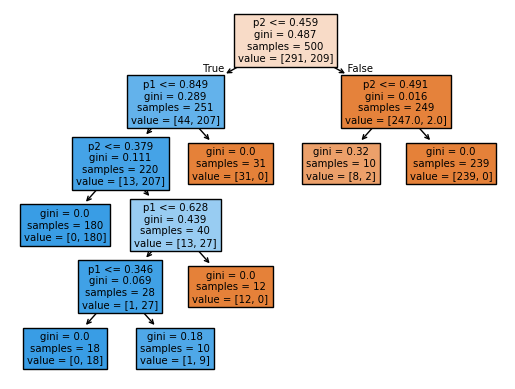

['p2>0.459', 'p2>0.491)']
['p2<=0.459', 'p1>0.849)']
['p2<=0.459', 'p1<=0.849', 'p2>0.379', 'p1>0.628)']
['p2>0.459', 'p2<=0.491)']


In [24]:
my_class = TreeRuler(df, 'label', cart_model)
my_class.get_rules()

# Print the rules
for _ in my_class.rules:
    print(_)
    
my_class.visualize_tree()

# Print the rules using def get_rule_constraints
for _ in range(len(my_class.rules)):
    print(my_class.get_rule_constraints(_))